In [187]:
import numpy as np
import pandas as pd

# Configuración
np.random.seed(0)
n_samples = 1000
n_features = 10

# Generar características aleatorias
X = np.random.rand(n_samples, n_features) * 100  # Escala los datos para que no estén normalizados

# Generar un objetivo binario aleatorio
y = np.random.randint(0, 2, n_samples)

# Crear un DataFrame
columns = [f'feature_{i+1}' for i in range(n_features)]
data = pd.DataFrame(X, columns=columns)
data['target'] = y

# Mostrar las primeras filas del dataset
data.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,54.881350,71.518937,60.276338,54.488318,42.365480,64.589411,43.758721,89.177300,96.366276,38.344152,0
1,79.172504,52.889492,56.804456,92.559664,7.103606,8.712930,2.021840,83.261985,77.815675,87.001215,0
2,97.861834,79.915856,46.147936,78.052918,11.827443,63.992102,14.335329,94.466892,52.184832,41.466194,1
3,26.455561,77.423369,45.615033,56.843395,1.878980,61.763550,61.209572,61.693400,94.374808,68.182030,0
4,35.950790,43.703195,69.763120,6.022547,66.676672,67.063787,21.038256,12.892630,31.542835,36.371077,1


In [188]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [189]:
df2 = data.copy()
print('Número de observaciones (filas) = {}'.format(df2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(df2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(df2.isnull().sum())

Número de observaciones (filas) = 1000
Total de variables disponibles (columnas) = 11 
Columnas que cuentan con un valor nulo -
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
target        0
dtype: int64


In [190]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   1000 non-null   float64
 1   feature_2   1000 non-null   float64
 2   feature_3   1000 non-null   float64
 3   feature_4   1000 non-null   float64
 4   feature_5   1000 non-null   float64
 5   feature_6   1000 non-null   float64
 6   feature_7   1000 non-null   float64
 7   feature_8   1000 non-null   float64
 8   feature_9   1000 non-null   float64
 9   feature_10  1000 non-null   float64
 10  target      1000 non-null   int32  
dtypes: float64(10), int32(1)
memory usage: 82.2 KB


In [191]:
import pylab
import scipy.stats as stats

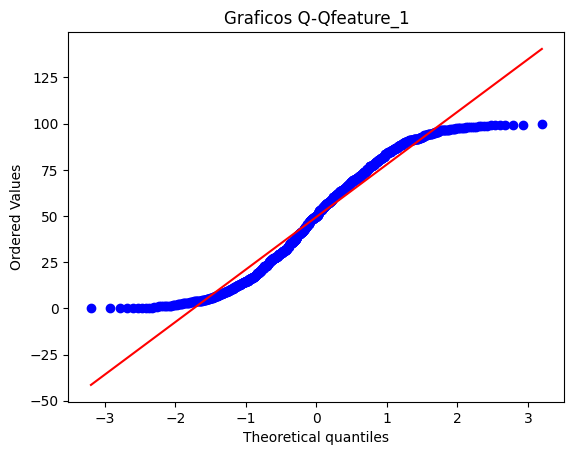

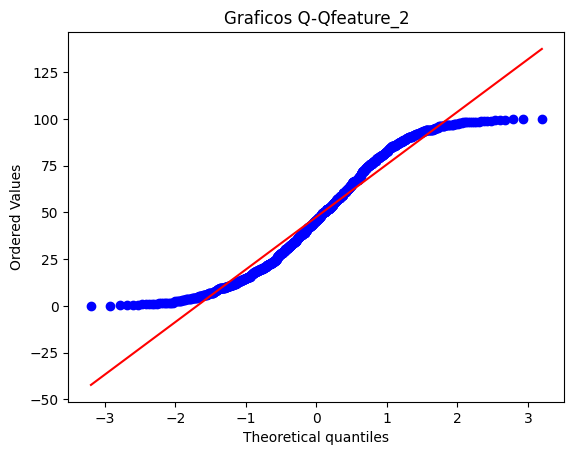

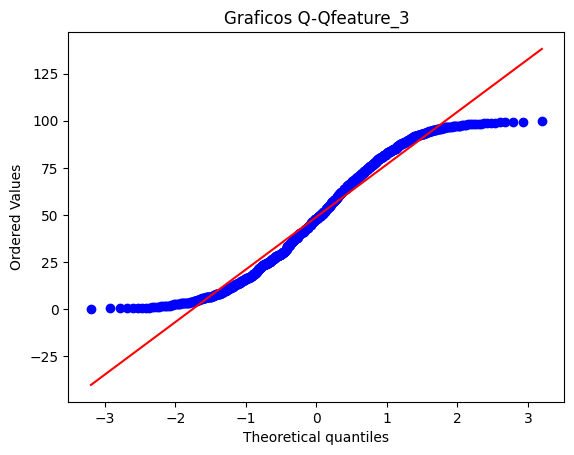

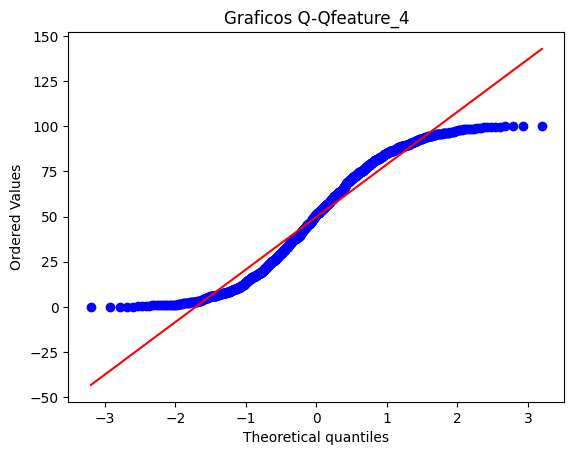

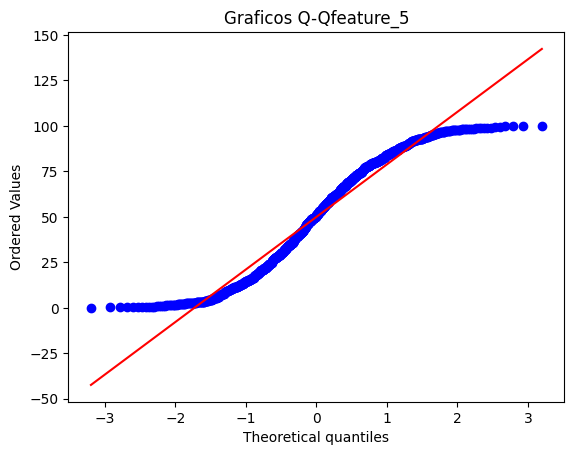

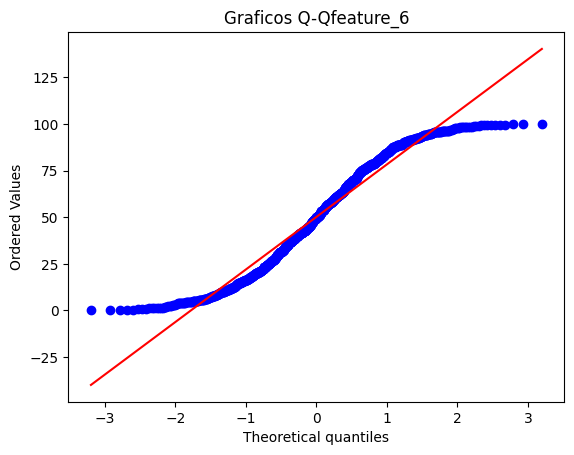

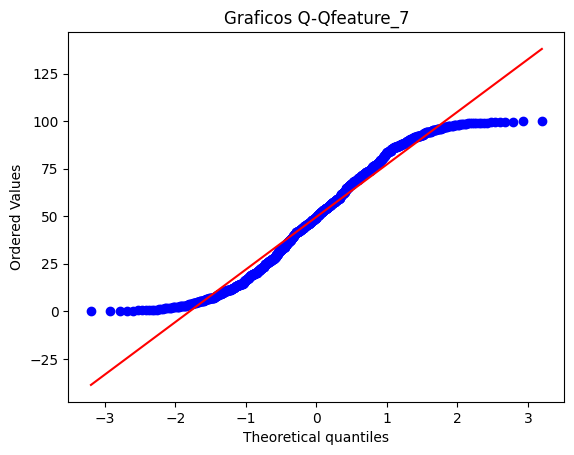

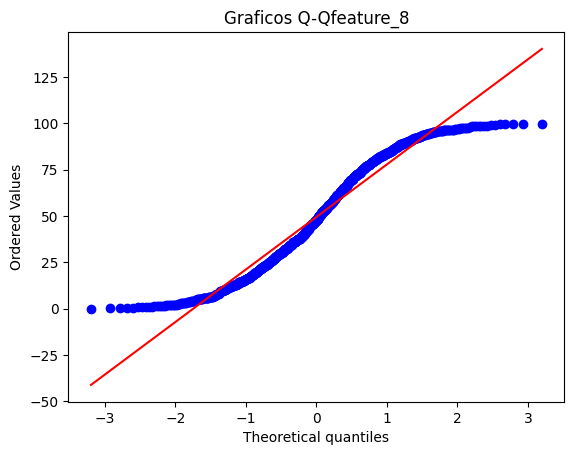

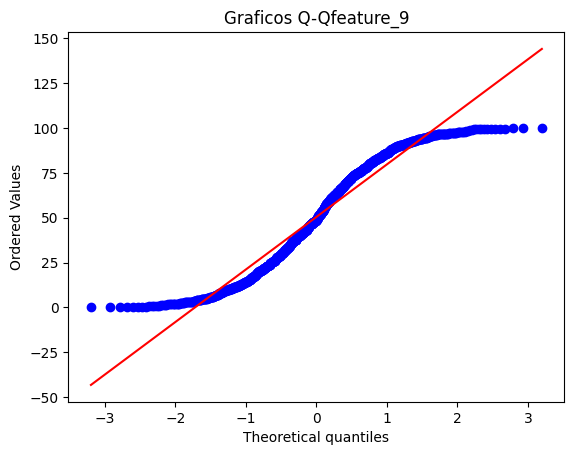

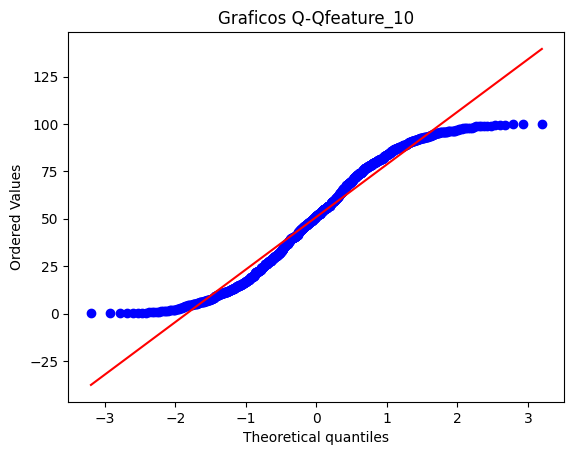

In [192]:
# Función para crear gráficos Q-Q

def crear_quantile(variable,j):
    plt.figure(j)
    stats.probplot(df2[variable],dist='norm',plot=pylab)
    plt.title('Graficos Q-Q'+variable)
    plt.show()
    
variables = ['feature_1','feature_2','feature_3','feature_4','feature_5',
            'feature_6','feature_7','feature_8','feature_9','feature_10']

# Generar gráficos Q-Q para cada variable
for j, variable in enumerate(variables):
    crear_quantile(variable,j)

In [193]:
from scipy.stats import shapiro

In [194]:
# Función para calcular la prueba de Shapiro-Wilk
def calcular_shapiro(variable):
    estadistico, p_value = stats.shapiro(df2[variable])
    print(f"Estadístico de {variable} = {estadistico: .2f}, p-valor de = {p_value: .4f}")

In [195]:
variables = ['feature_1','feature_2','feature_3','feature_4','feature_5',
            'feature_6','feature_7','feature_8','feature_9','feature_10']

for variable in variables:
    calcular_shapiro(variable)

Estadístico de feature_1 =  0.95, p-valor de =  0.0000
Estadístico de feature_2 =  0.95, p-valor de =  0.0000
Estadístico de feature_3 =  0.96, p-valor de =  0.0000
Estadístico de feature_4 =  0.95, p-valor de =  0.0000
Estadístico de feature_5 =  0.95, p-valor de =  0.0000
Estadístico de feature_6 =  0.95, p-valor de =  0.0000
Estadístico de feature_7 =  0.96, p-valor de =  0.0000
Estadístico de feature_8 =  0.95, p-valor de =  0.0000
Estadístico de feature_9 =  0.94, p-valor de =  0.0000
Estadístico de feature_10 =  0.96, p-valor de =  0.0000


In [196]:
from sklearn.preprocessing import MinMaxScaler

In [197]:
# Definir caracteristicas numericas y categoricas
numeric_features = ['feature_1','feature_2','feature_3','feature_4','feature_5',
            'feature_6','feature_7','feature_8','feature_9','feature_10']

In [200]:
scaler = MinMaxScaler()
# Aplicar la normalización
df2[numeric_features] = scaler.fit_transform(df2[numeric_features])
print(df2.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.550058   0.715065   0.602500   0.544780   0.423245   0.646056   
1   0.793738   0.528661   0.567704   0.925598   0.070258   0.087087   
2   0.981223   0.799084   0.460903   0.780491   0.117546   0.640081   
3   0.264900   0.774144   0.455562   0.568337   0.017958   0.617787   
4   0.360153   0.436743   0.697578   0.059988   0.666611   0.670809   

   feature_7  feature_8  feature_9  feature_10  target  
0   0.437569   0.893349   0.965079    0.382898       0  
1   0.020148   0.834071   0.779272    0.869926       0  
2   0.143299   0.946357   0.522546    0.414148       1  
3   0.612099   0.617930   0.945132    0.681557       0  
4   0.210336   0.128891   0.315791    0.363149       1  


In [203]:
# Realizar la prueba de Shapiro-Wilk para las columnas normalizadas
print("Prueba de Shapiro-Wilk después de la normalización:")
for variable in numeric_features:
    calcular_shapiro(variable)

Prueba de Shapiro-Wilk después de la normalización:
Estadístico de feature_1 = 0.95, p-valor de = 0.0000
Estadístico de feature_2 = 0.95, p-valor de = 0.0000
Estadístico de feature_3 = 0.96, p-valor de = 0.0000
Estadístico de feature_4 = 0.95, p-valor de = 0.0000
Estadístico de feature_5 = 0.95, p-valor de = 0.0000
Estadístico de feature_6 = 0.95, p-valor de = 0.0000
Estadístico de feature_7 = 0.96, p-valor de = 0.0000
Estadístico de feature_8 = 0.95, p-valor de = 0.0000
Estadístico de feature_9 = 0.94, p-valor de = 0.0000
Estadístico de feature_10 = 0.96, p-valor de = 0.0000
